### Regresión Logistica EDA

---


In [278]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#  Gestión de warnings
import warnings
warnings.filterwarnings("ignore")

Objetivos:
Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


In [279]:
df = pd.read_csv("../files_rl/heart.csv", index_col = 0)
df.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 1)Explicar los datos y las variables disponibles en el conjunto de datos seleccionado


Variables predictoras:


- Age: edad del paciente en años

- Sex: sexo del paciente [M: Male, F: Female]

- ChestPainType: tipo de dolor de pecho [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: presion sanguinea en reposo[mm Hg]

- Cholesterol: colesterol [mm/dl]

- FastingBS: azucar en sangre [1: if FastingBS > 120 mg/dl, 0: otherwise]

- RestingECG: electrocardiograma resultados [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: frecuencia cardiaca máxima alcanzada [Numeric value between 60 and 202]

- ExerciseAngina:  angina inducida por el ejercicio [Y: Yes, N: No]

- Oldpeak: oldpeak = ST pico mas bajo del electrocardiograma [Numeric value measured in depression]

- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


Variable respuesta:

- HeartDisease: cardiopatia [1: heart disease, 0: Normal]

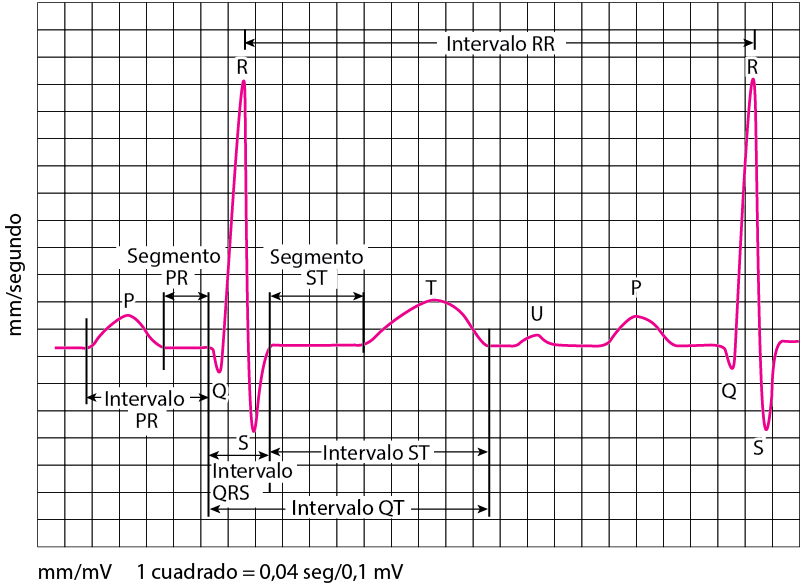

### 2)Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.


In [280]:
df.shape

(918, 11)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 40 to 38
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    object 
 1   ChestPainType   918 non-null    object 
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [283]:
df.describe(include='O').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [284]:
df.isnull().sum()

Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [285]:
df.duplicated().sum()

0

In [286]:
df.columns

Index(['Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [287]:
df.reset_index(inplace=True)
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [288]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [289]:
df.rename(columns = cambio_columnas, inplace=True)


In [290]:
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [291]:
df.dtypes

age                 int64
sex                object
chestpaintype      object
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg         object
maxhr               int64
exerciseangina     object
oldpeak           float64
st_slope           object
heartdisease        int64
dtype: object

In [292]:
lista_columnas =["sex","chestpaintype", "restingecg","exerciseangina", "st_slope", "fastingbs","heartdisease"]

In [293]:
for col in lista_columnas:
    df[col] = df[col].astype('category')

In [294]:
df.dtypes

age                  int64
sex               category
chestpaintype     category
restingbp            int64
cholesterol          int64
fastingbs         category
restingecg        category
maxhr                int64
exerciseangina    category
oldpeak            float64
st_slope          category
heartdisease      category
dtype: object

---

### Analisis visual

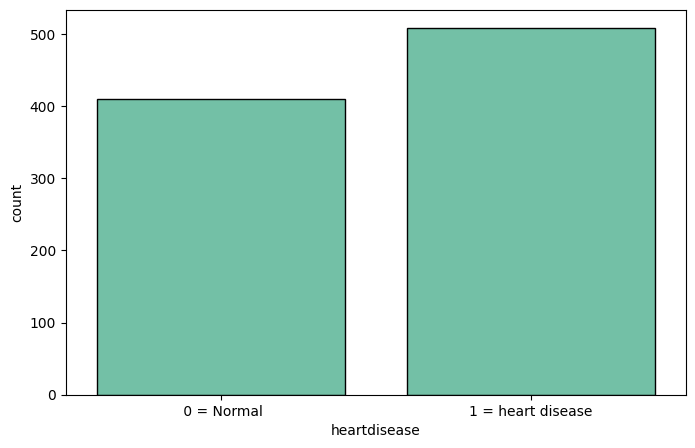

In [295]:
plt.figure(figsize=(8,5)) 
fig1 = sns.countplot(data = df, x = "heartdisease",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=[" 0 = Normal", "1 = heart disease"]) 
plt.show();

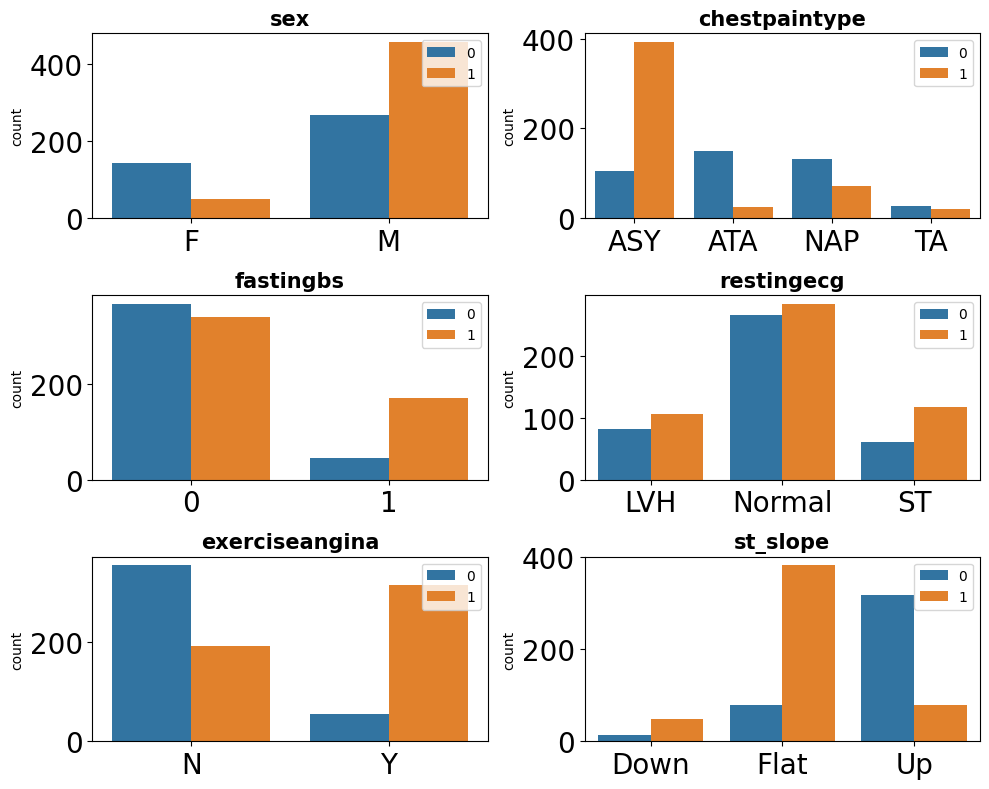

In [296]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 8))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns
columnas_cat = columnas_cat.drop("heartdisease")


for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "heartdisease",
        #alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Columna sex: vemos que tenemos mas datos de hombres que de mujeres, por lo que habria un desbalance de datos. Por otro lado concluimos de manera preliminar que las mujeres presentan menos cardiopatias que los hombres.

Columna chestpaintype: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] la mayoria de las personas con cardiopatias son asintomáticos.

Columna restingecg:  La mayoría de las personas, tanto con cardiopatias como normales presentan un ECG normal. [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

Columna exerciseangina: cuando realizan ejercicio la mayoria de las personas con cardiopatias presentan dolor.

Columna st_slope:  vemos que las personas con cardiopatías son mayoria en flat, esto quiere decir que presentan mas complicaciones en esta prueba, es por ello que no pasan a la fase de Up, y vemos que en esta ultima fase (Up) participaron mayormente personas sin cardiopatías(normales)

Columna FastingBS: la mayoria de las personas se ubican en  0: otherwise, pero para los casos con  FastingBS > 120 mg/dl son mayoria las personas con cardiopatías.



In [297]:
df.select_dtypes(np.number)

,age,restingbp,cholesterol,maxhr,oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


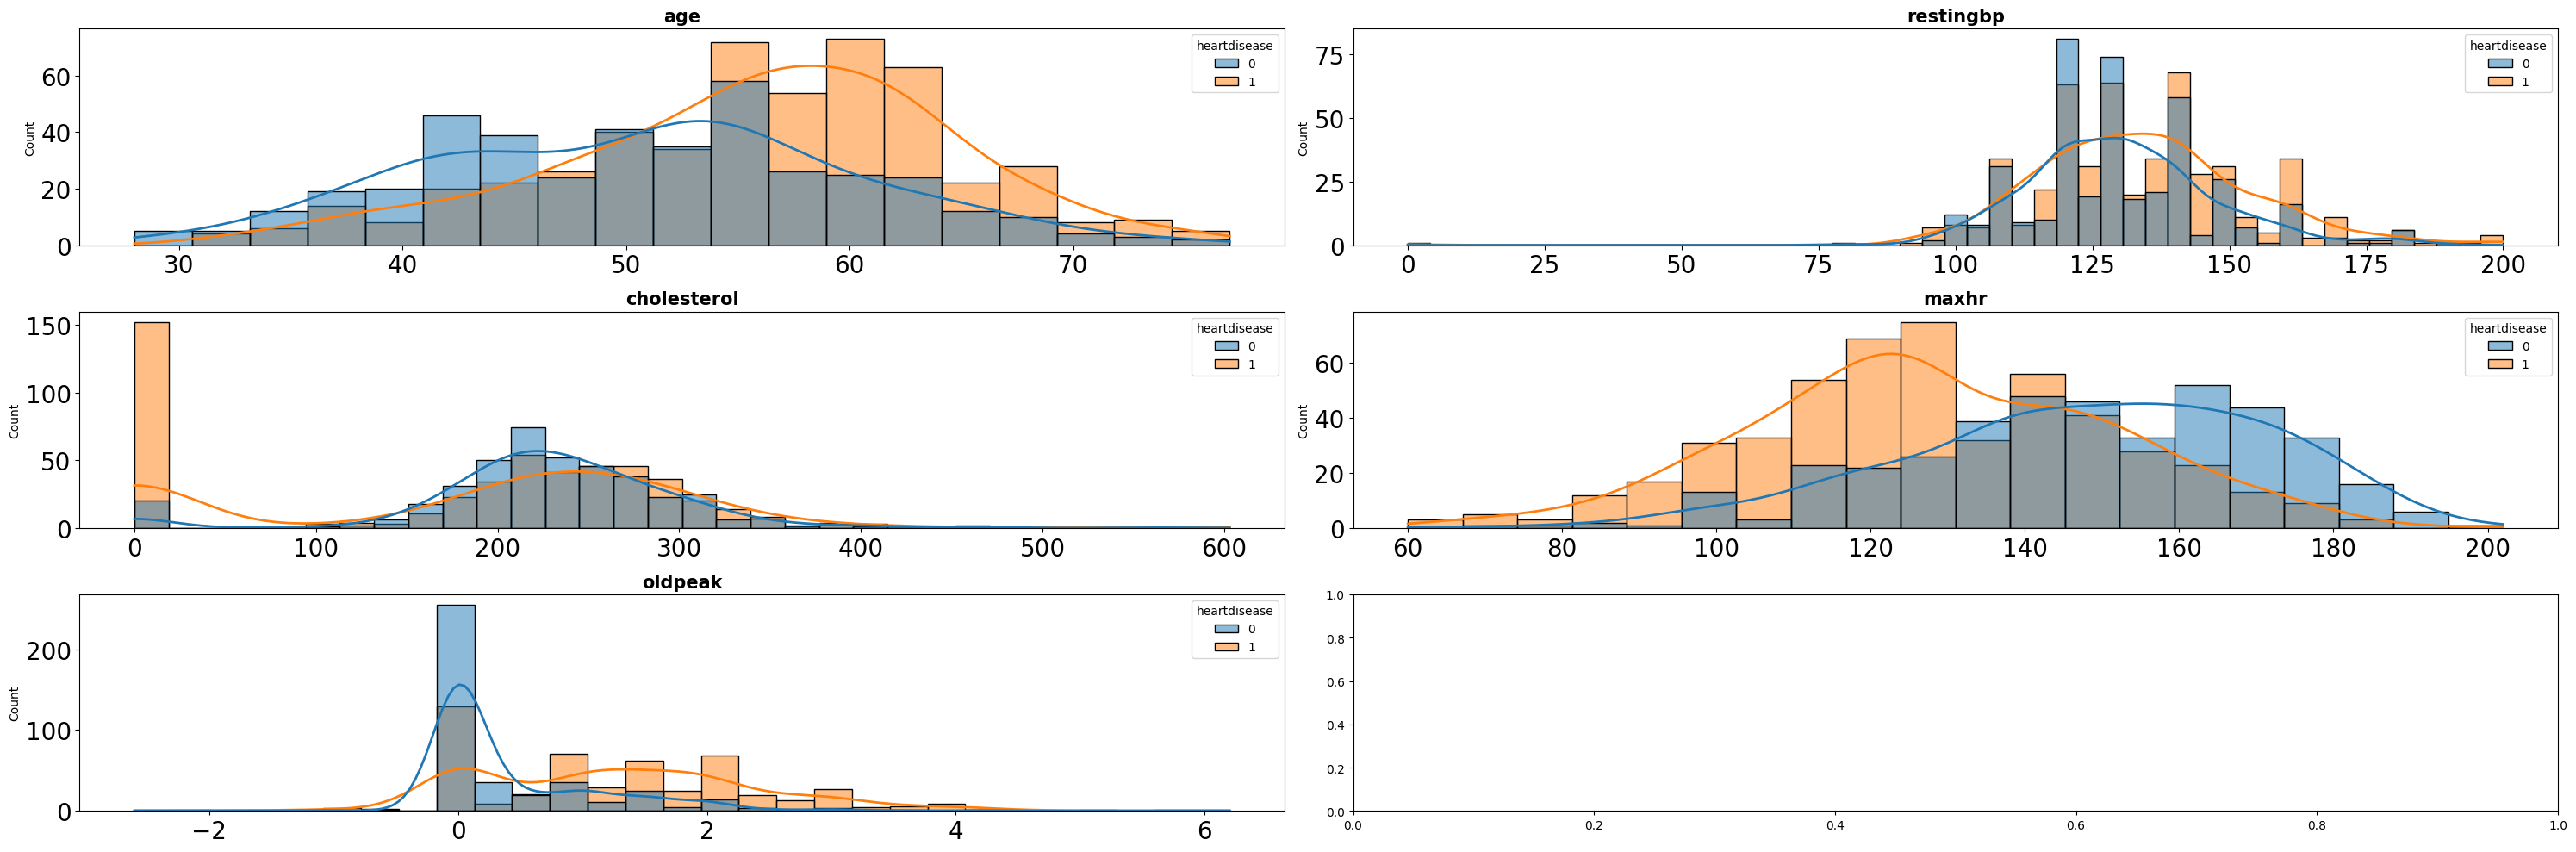

In [298]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

#lista_colores = ["blue", "green", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        #color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        #alpha = 0.2, 
        hue="heartdisease",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Columna age: las personas con mas colesterol son las que se encuentran entre 54-56 años.

Columna RestingBP: presion sanguinea en reposo[mm Hg]

- MaxHR: frecuencia cardiaca máxima alcanzada [Numeric value between 60 and 202]

- Oldpeak: oldpeak = ST [Numeric value measured in depression]



In [299]:
numericas= df.select_dtypes(np.number)

In [300]:
correlacion= numericas.corr()

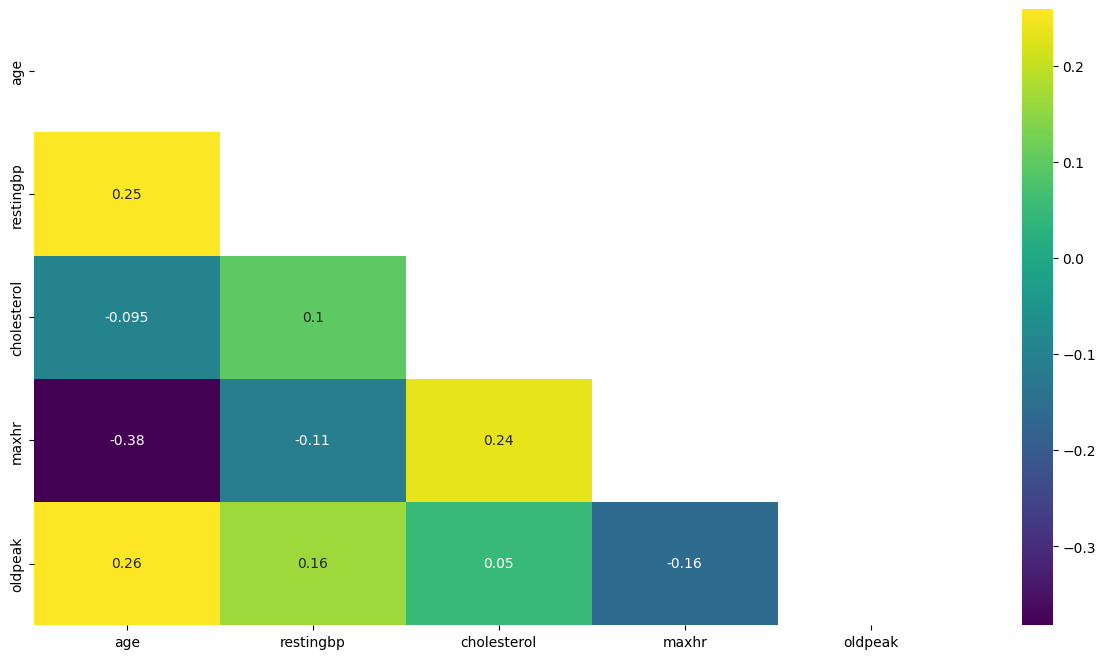

In [301]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

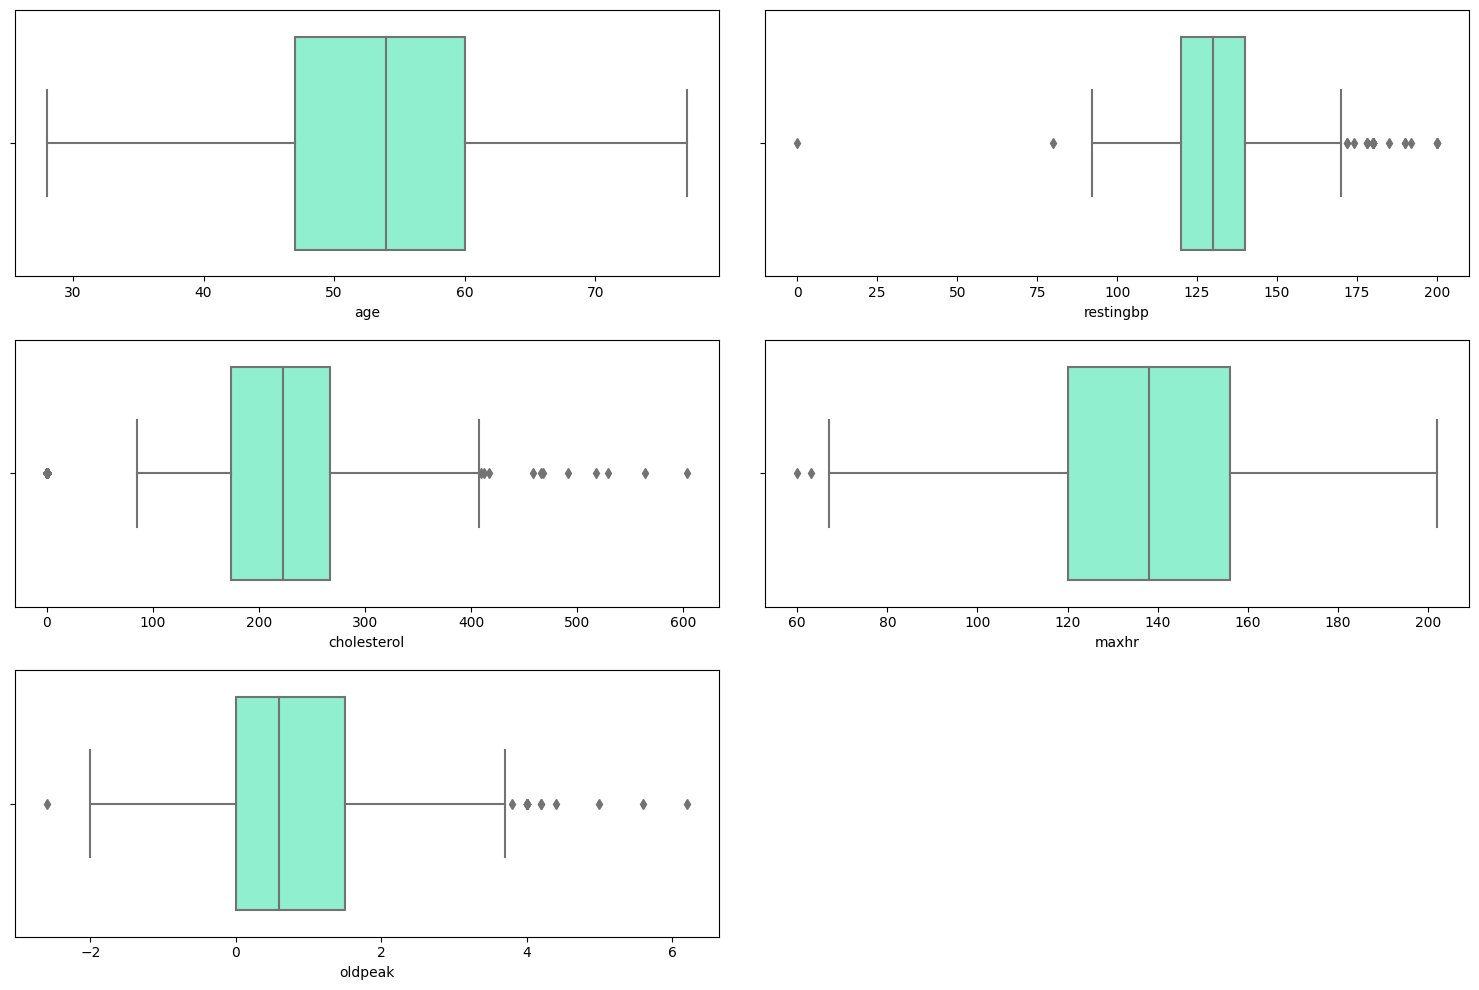

In [302]:
# Análisis de outliers

fig, axes = plt.subplots(3, 2, figsize=(15,10))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [303]:
df[df["restingbp"]<75]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [304]:
df[df["restingbp"]<75]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Como identificamos  que una misma fila es la que produce los outliers mas extremos hacia la izquierda, hemos decidido eliminar este registro

In [305]:
df.drop([449],axis=0,inplace=True) #eliminamos el registro

In [306]:
df.reset_index(inplace=True, drop=True) #Reseteamos el indice por la eliminacion de la fila

In [307]:
numericas2= df.select_dtypes(np.number)

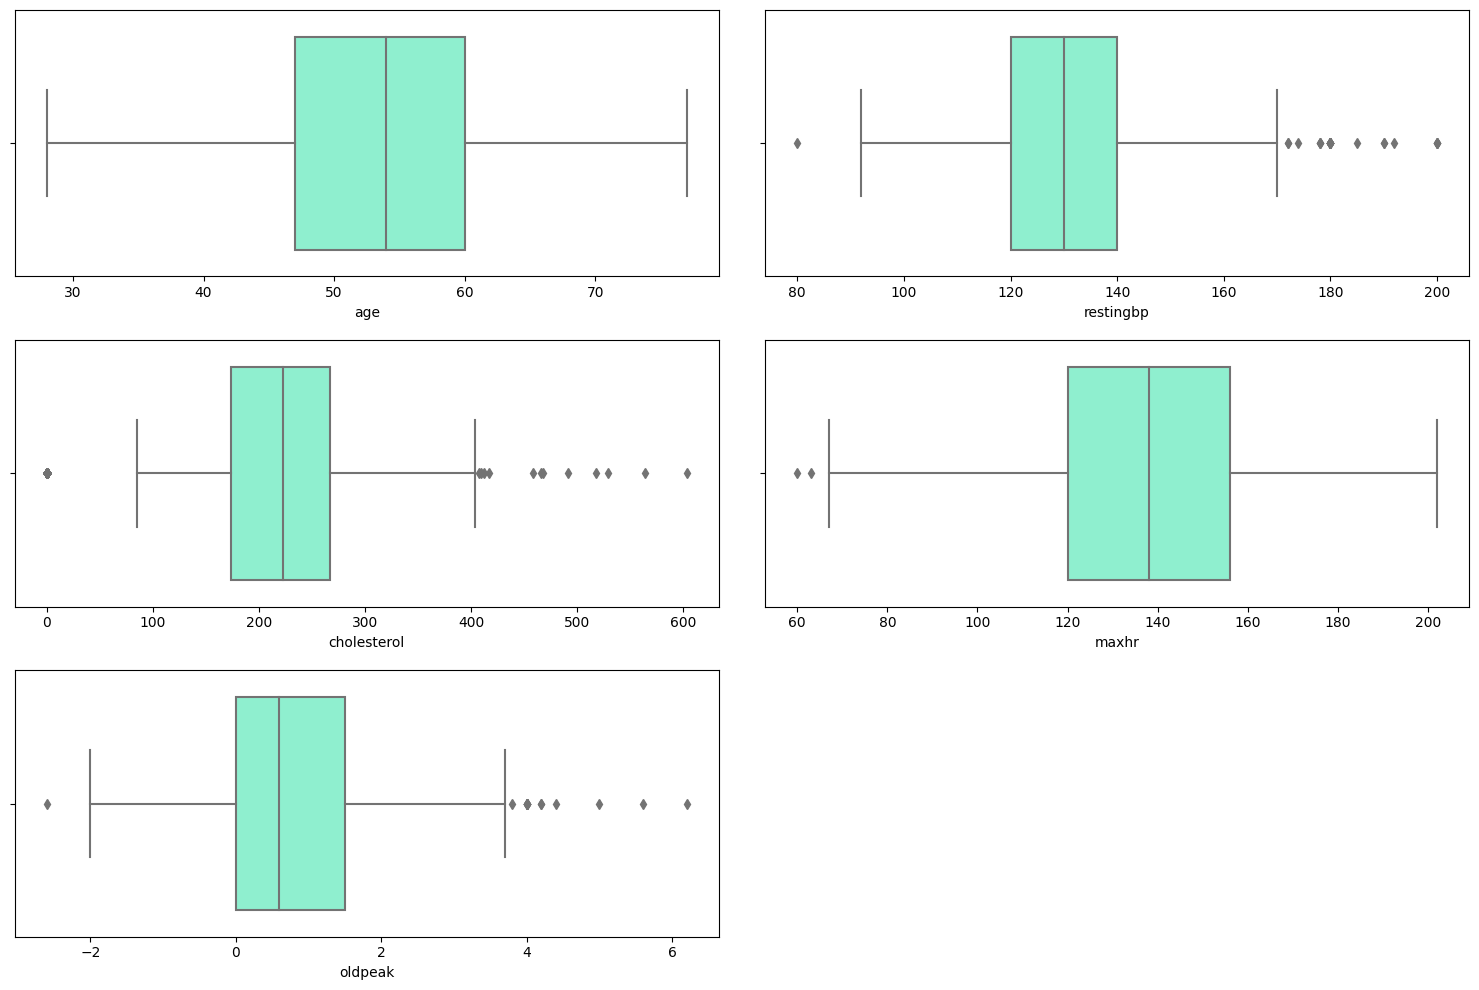

In [308]:
# Análisis de outliers

fig, axes = plt.subplots(3, 2, figsize=(15,10))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [309]:
df[df["cholesterol"]<75]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
514,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
517,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
534,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [315]:
df.shape

(917, 12)

In [319]:

numericas2.shape

(917, 5)

In [320]:
imputer = IterativeImputer( missing_values= 0,n_nearest_features=None, imputation_order='ascending')

In [321]:
imputer.fit(numericas2)

IterativeImputer(missing_values=0)

In [323]:
numericas_colesterol= pd.DataFrame(imputer.transform(numericas2), columns = numericas2.columns)

In [324]:
numericas_colesterol.head()

,age,restingbp,cholesterol,maxhr,oldpeak
0,40.0,140.0,289.0,172.0,1.448425
1,49.0,160.0,180.0,156.0,1.000000
2,37.0,130.0,283.0,98.0,1.441944
3,48.0,138.0,214.0,108.0,1.500000
4,54.0,150.0,195.0,122.0,1.630694


<AxesSubplot:xlabel='cholesterol'>

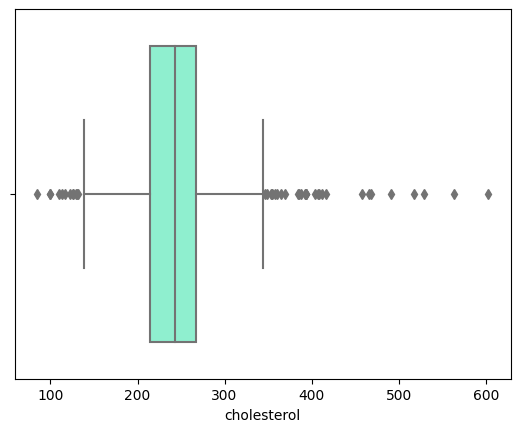

In [325]:
sns.boxplot(x = numericas_colesterol["cholesterol"], data = numericas2, color = "aquamarine")

In [326]:
df.drop(["cholesterol"], axis=1, inplace=True)

In [329]:
numericas_colesterol= numericas_colesterol[["cholesterol"]]
numericas_colesterol.head(2)

,cholesterol
0,289.0
1,180.0


In [330]:
df["cholesterol"]=numericas_colesterol["cholesterol"]

<AxesSubplot:xlabel='cholesterol'>

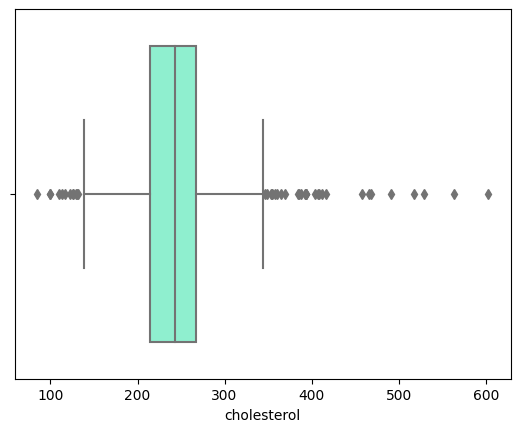

In [331]:
sns.boxplot(x = df["cholesterol"], data = df, color = "aquamarine")

In [335]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,917.0,53.509269,9.437636,28.0,47.0,54.000000,60.0,77.0
restingbp,917.0,132.540894,17.999749,80.0,120.0,130.000000,140.0,200.0
maxhr,917.0,136.789531,25.467129,60.0,120.0,138.000000,156.0,202.0
oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.600000,1.5,6.2
cholesterol,917.0,244.639605,53.383863,85.0,214.0,242.845502,267.0,603.0


In [336]:
df.to_pickle("../files_rl/1-heart-eda.pk")